In [2]:
# Import  all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset using pandas read_csv 

df = pd.read_csv('credit_card_fraud_dataset.csv')

In [4]:
# Display dataset shape of the datasets

df.shape

(100000, 7)

In [5]:
# Display first 10 rows of the dataset 

df.head(10)

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0
3,4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0
4,5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0
5,6,2024-08-30 01:52:35.462867,3086.22,302,purchase,New York,0
6,7,2024-01-02 11:31:35.462875,1466.90,902,refund,Philadelphia,0
7,8,2024-05-12 12:25:35.462885,917.21,266,purchase,New York,0
8,9,2023-11-16 02:20:35.462894,1625.73,32,refund,Chicago,0
9,10,2023-10-24 06:51:35.462901,662.07,193,purchase,Dallas,0


In [6]:
# Understanding the datatypes of all the features columns of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TransactionID    100000 non-null  int64  
 1   TransactionDate  100000 non-null  object 
 2   Amount           100000 non-null  float64
 3   MerchantID       100000 non-null  int64  
 4   TransactionType  100000 non-null  object 
 5   Location         100000 non-null  object 
 6   IsFraud          100000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 5.3+ MB


In [7]:
# Statistical Analysis of the dataset 

df.describe()

,TransactionID,Amount,MerchantID,IsFraud
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,2497.092666,501.676070,0.010000
std,28867.657797,1442.415999,288.715868,0.099499
min,1.000000,1.050000,1.000000,0.000000
25%,25000.750000,1247.955000,252.000000,0.000000
50%,50000.500000,2496.500000,503.000000,0.000000
75%,75000.250000,3743.592500,753.000000,0.000000
max,100000.000000,4999.770000,1000.000000,1.000000


In [8]:
# Checking null values present in the dataset

df.isnull().sum()

TransactionID      0
TransactionDate    0
Amount             0
MerchantID         0
TransactionType    0
Location           0
IsFraud            0
dtype: int64

In [9]:
# Reset index columns to Transaction ID

df = df.set_index('TransactionID')

df

,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
TransactionID,,,,,,
1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0
4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0
5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0
...,...,...,...,...,...,...
99996,2024-06-07 00:57:36.027591,1057.29,289,refund,San Antonio,0
99997,2023-10-22 23:12:36.027594,297.25,745,refund,San Antonio,0
99998,2024-05-31 19:27:36.027597,3448.56,690,purchase,San Antonio,0


In [10]:
# Find the Balance in the target 

df['IsFraud'].value_counts()

IsFraud
0    99000
1     1000
Name: count, dtype: int64

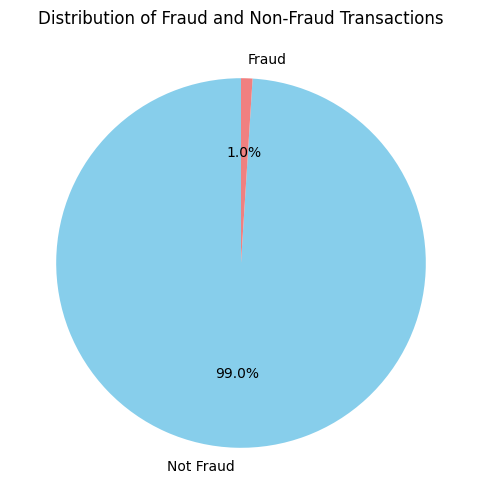

In [13]:
#Pie Chart representation to understand balance of the target columns
comparing_values = df['IsFraud'].value_counts()

labels = comparing_values.index.map({0: "Not Fraud", 1: "Fraud"})

plt.figure(figsize=(6, 6))
plt.pie(
    comparing_values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'lightcoral']
)
plt.title("Distribution of Fraud and Non-Fraud Transactions")
plt.show()

In [12]:
# Different types of locations and locations that appear most in the dataset

df['Location'].value_counts()

Location
Chicago         10193
San Diego       10111
Dallas          10076
San Antonio     10062
New York         9993
Houston          9991
Phoenix          9960
Los Angeles      9936
Philadelphia     9873
San Jose         9805
Name: count, dtype: int64

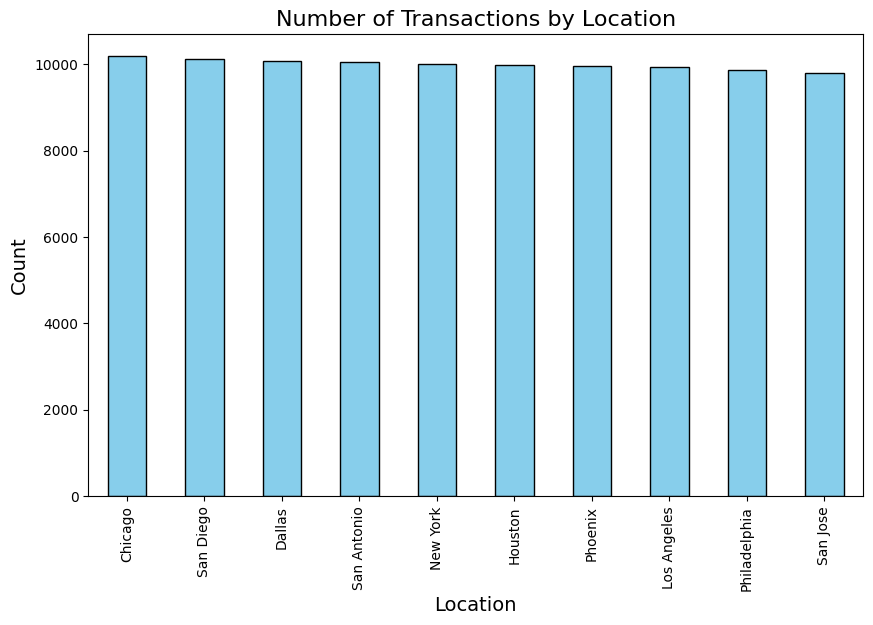

In [18]:
# Graphical represention of the location
location_total = df['Location'].value_counts()

plt.figure(figsize=(10, 6))
location_total.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Number of Transactions by Location', fontsize=16)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

/var/folders/x3/znqp056977l_nmf5cqgjdp9r0000gn/T/ipykernel_20094/2266530378.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_encoded = data_encoded.replace({True: 1, False: 0})


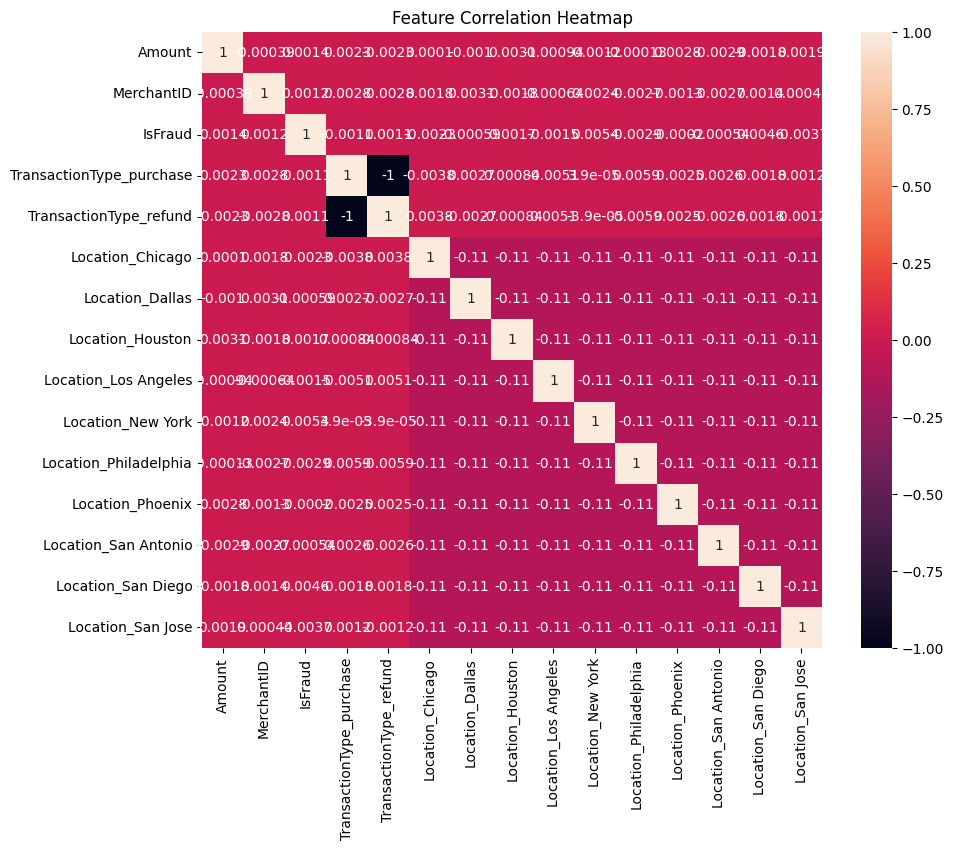

In [19]:
##Finding correlation between features
new_df2 = df.iloc[:,1:]
#new_df2.corr()
data_encoded = pd.get_dummies(new_df2, columns=['TransactionType', 'Location'])
#data_encoded.head(5)
data_encoded = data_encoded.replace({True: 1, False: 0})
data_encoded.head(5)


correlation_matrix = data_encoded.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Feature Correlation Heatmap')
plt.show()